# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [92]:
# Load pickled data
import pickle
import csv
import random
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


print(train.keys())

dict_keys(['coords', 'features', 'labels', 'sizes'])


---

## Step 1: Dataset Summary & Exploration

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [93]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(train['sizes'])

# TODO: Number of testing examples.
n_test = len(test['sizes'])

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


## Preview photos from original dataset

----

## Step 2: Design and Test a Model Architecture


### Pre-process the Data Set (normalization, grayscale, etc.)

I heavily used multiple preprocess procedure to process the images, including grayscale, equalizeHist, normalize and adding noise.

I found that adding noise helped me the most.

In [ ]:
## Preview the pictures before preprocess

In [ ]:
plt.figure(figsize=(12, 8))

idx = random.randint(0,len(X_train)-3)
for i in range(3)
    plt.subplot(1, 3, 1)
    plt.imshow(X_train[idx+i].squeeze(),cmap='gray') 
    plt.axis('off')
plt.show()

In [ ]:
### Grayscale
plt.figure(figsize=(12, 8))

idx = random.randint(0,len(X_train))
image = X_train[idx]
plt.subplot(1, 3, 1)
plt.imshow(image) 
plt.axis('off')

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 3, 2)
plt.imshow(image.squeeze(),cmap='gray') 
plt.axis('off')
plt.show()

In [ ]:
### EqualizeHist
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image) 
plt.axis('off')

image = cv2.equalizeHist(image)
plt.subplot(1, 3, 2)
plt.imshow(image.squeeze(),cmap='gray') 
plt.axis('off')
plt.show()

In [ ]:
### Normalize
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image) 
plt.axis('off')

image = cv2.normalize(image, image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.subplot(1, 3, 2)
plt.imshow(image.squeeze(),cmap='gray') 
plt.axis('off')
plt.show()

In [ ]:
### Adding noise
def noisy(image):
    shape = image.shape
    mean = 0
    var = 0.001
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,shape)
    gauss = gauss.reshape(shape)
    noisy = image + gauss
    return noisy
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(image) 
plt.axis('off')

image = noisy(image)
plt.subplot(1, 3, 2)
plt.imshow(image.squeeze(),cmap='gray') 
plt.axis('off')
plt.show()

In [94]:
def noisy(image):
    shape = image.shape
    mean = 0
    var = 0.001
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,shape)
    gauss = gauss.reshape(shape)
    noisy = image + gauss
    return noisy

def pre_process(image_data):
    result_set = []
    for i in range(len(image_data)):
        image = cv2.cvtColor(image_data[i], cv2.COLOR_BGR2GRAY)
        image = cv2.equalizeHist(image)
        image = cv2.normalize(image, image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        image = noisy(image)
        result_set.append(np.expand_dims(image, axis=2))
    return result_set

X_train = np.array(pre_process(X_train))
X_validation = np.array(pre_process(X_valid))
X_test = np.array(pre_process(X_test))
y_validation = y_valid
print("Image dim: ", X_train[0].shape)
print("Preparation done")

Image dim:  (32, 32, 1)
Preparation done


## Review the pictures after preprocess

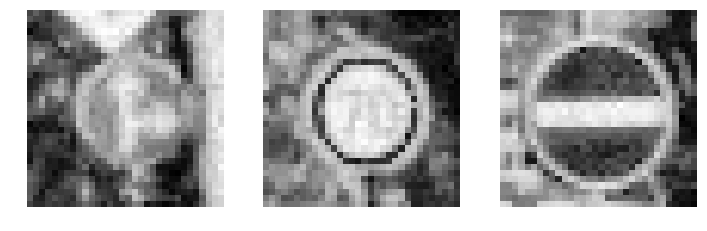

In [95]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
index = random.randint(0, len(X_train))
plt.imshow(X_train[1000].squeeze(),cmap='gray') 
plt.axis('off')

plt.subplot(1, 3, 2)
index = random.randint(0, len(X_train))
plt.imshow(X_validation[1000].squeeze(),cmap='gray') 
plt.axis('off')

plt.subplot(1, 3, 3)
index = random.randint(0, len(X_train))
plt.imshow(X_test[1000].squeeze(),cmap='gray') 
plt.axis('off')


plt.show()

## Model Architecture

In [96]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

## setup network
import tensorflow as tf
from sklearn.utils import shuffle

## lets try lenet lab
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x84.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 64), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation.
    conv1 = tf.nn.relu(conv1)
    #conv1 = tf.nn.sigmoid(conv1)

    #Pooling. Input = 28x28x84. Output = 14x14x64.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation.
    #conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.sigmoid(conv2)
    
    #ooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    #Layer 3: Fully Connected. Input = 800. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation.
    #fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.sigmoid(fc1)

    
    # only use two fully connected 
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(240, n_classes), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc1, fc4_W) + fc4_b
    
    return logits

# Train, Validate and Test the Model

## Features and Labels
Train LeNet to classify MNIST data.
x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
You do not need to modify this section.

In [97]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

Tensor("one_hot_2:0", dtype=float32)


## Training Pipeline

In [98]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.


In [99]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.
Before each epoch, shuffle the training set.
After each epoch, measure the loss and accuracy of the validation set.
Save the model after training.
You do not need to modify this section.

In [100]:
EPOCHS = 10
BATCH_SIZE = 64

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss_val = sess.run([training_operation,loss_operation], 
                                   feed_dict={x: batch_x, y: batch_y})
        print("Loss at epoch ", i, loss_val)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved");                                             

Training...

Loss at epoch  0 0.496928
EPOCH 1 ...
Validation Accuracy = 0.832

Loss at epoch  1 0.189588
EPOCH 2 ...
Validation Accuracy = 0.915

Loss at epoch  2 0.0649
EPOCH 3 ...
Validation Accuracy = 0.927

Loss at epoch  3 0.151319
EPOCH 4 ...
Validation Accuracy = 0.941

Loss at epoch  4 0.0981216
EPOCH 5 ...
Validation Accuracy = 0.942

Loss at epoch  5 0.0938452
EPOCH 6 ...
Validation Accuracy = 0.937

Loss at epoch  6 0.0110408
EPOCH 7 ...
Validation Accuracy = 0.941

Loss at epoch  7 0.0306104
EPOCH 8 ...
Validation Accuracy = 0.954

Loss at epoch  8 0.00862912
EPOCH 9 ...
Validation Accuracy = 0.948

Loss at epoch  9 0.0106492
EPOCH 10 ...
Validation Accuracy = 0.954

Model saved


In [101]:
with tf.Session(config=config) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.932


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

./real_test/3.jpg
./real_test/4.jpg
./real_test/2.jpg
./real_test/1.jpg
./real_test/6.jpg
./real_test/5.jpg


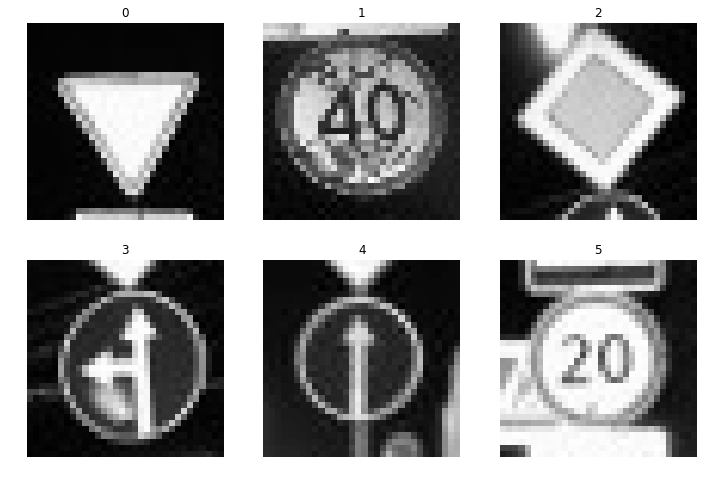

In [102]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# This segment of code is credited by NikolasEnt at the following url:
# https://github.com/NikolasEnt/Traffic-Sign-Classifier/blob/master/Traffic_Sign_Classifier.ipynb

#Import classes
signs_class=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))

#Import test images  
test_fname = [path for path in glob.glob("./real_test/*")]
index = random.randint(0, len(X_test)-16)
X_real = np.float32(np.zeros((6,32,32,1)))
y_real = [0,1,2,3,4,5]

for i, img in enumerate(test_fname):
    print(img)
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.normalize(img, img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img = np.expand_dims(img, axis=2)
    X_real[i]=img


#Visualize new raw images
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_real[i].squeeze(),cmap='gray') 
    plt.title(i)
    plt.axis('off')
plt.show()

### Predict the Sign Type for Each Image

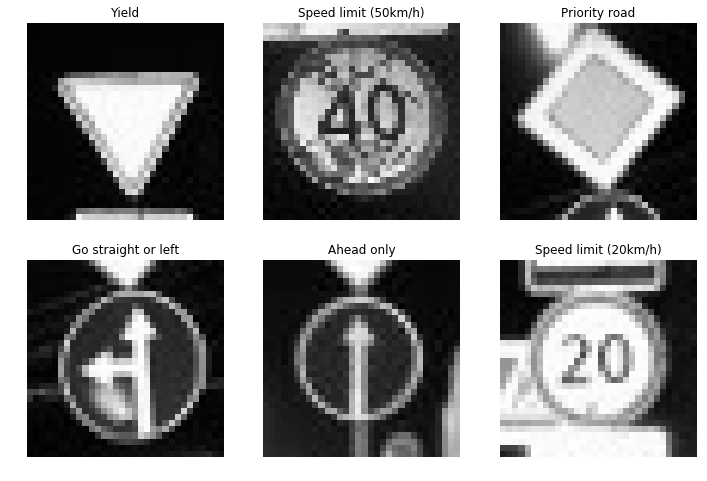

In [103]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# This segment of code is credited by NikolasEnt at the following url:
# https://github.com/NikolasEnt/Traffic-Sign-Classifier/blob/master/Traffic_Sign_Classifier.ipynb

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    signs_classes = sess.run(tf.argmax(logits, 1), feed_dict={x: X_real})
    
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_real[i].squeeze(),cmap='gray') 
    plt.title(signs_class[signs_classes[i]])
    plt.axis('off')
plt.show()

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

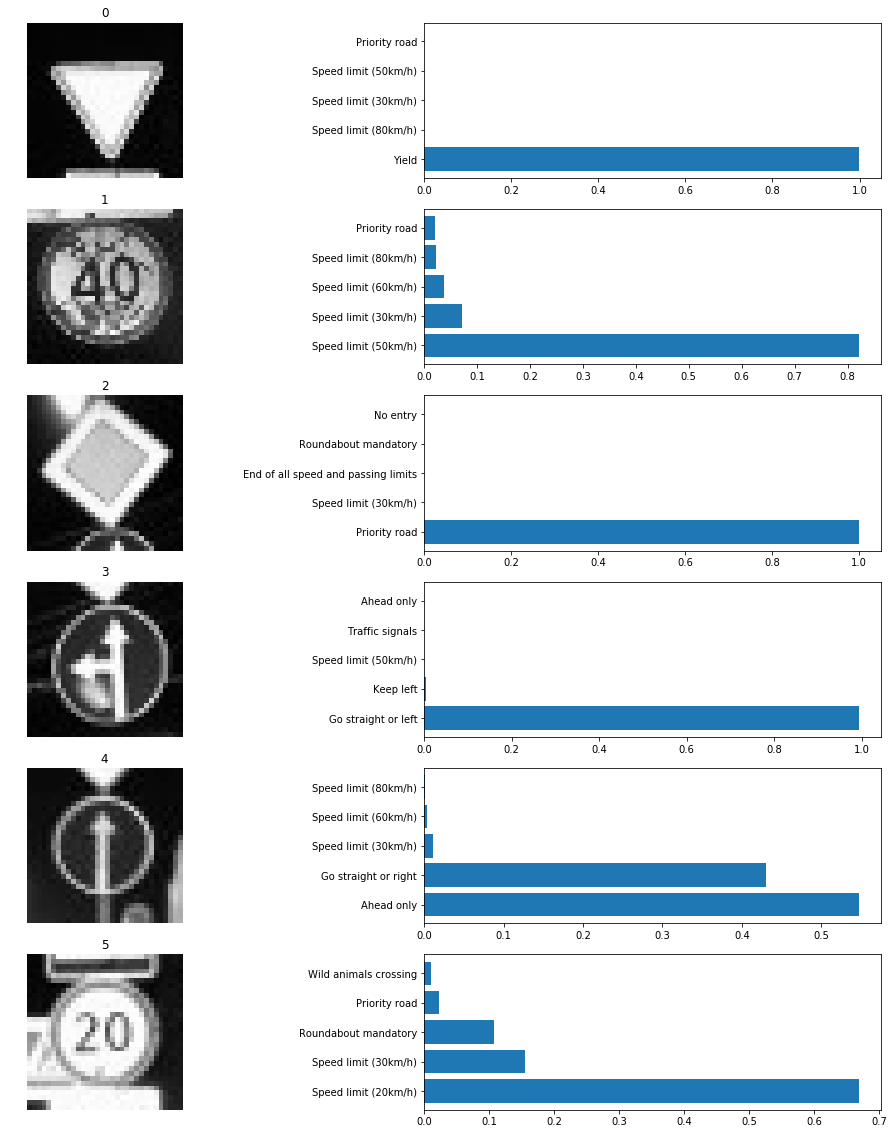

In [104]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

# This segment of code is credited by NikolasEnt at the following url:
# https://github.com/NikolasEnt/Traffic-Sign-Classifier/blob/master/Traffic_Sign_Classifier.ipynb

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sign_bar = sess.run(tf.nn.top_k(sess.run(tf.nn.softmax(logits), feed_dict={x: X_real}),k=5)) 
    

plt.figure(figsize=(18, 20))
for i in range(6):
    plt.subplot(6, 2, 2*i+1)
    plt.imshow(X_real[i].squeeze(),cmap='gray') 
    plt.title(i)
    plt.axis('off')
    plt.subplot(6, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), sign_bar.values[i, :])
    labs=[signs_class[j] for j in sign_bar.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**